In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [5]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
df[['left']].value_counts().sort_values()

left
1        3571
0       11428
Name: count, dtype: int64

In [13]:
# Define a mapping dictionary
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}

# Apply mapping
df['salary_num'] = df['salary'].map(salary_mapping)

# Check result
df[['salary', 'salary_num']]


,salary,salary_num
0,low,1
1,medium,2
2,medium,2
3,low,1
4,low,1


In [14]:
df['salary'] = df['salary'].map(salary_mapping)


In [15]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,2,2
2,0.11,0.88,7,272,4,0,1,0,sales,2,2
3,0.72,0.87,5,223,5,0,1,0,sales,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,1,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1,1
14995,0.37,0.48,2,160,3,0,1,0,support,1,1
14996,0.37,0.53,2,143,3,0,1,0,support,1,1
14997,0.11,0.96,6,280,4,0,1,0,support,1,1


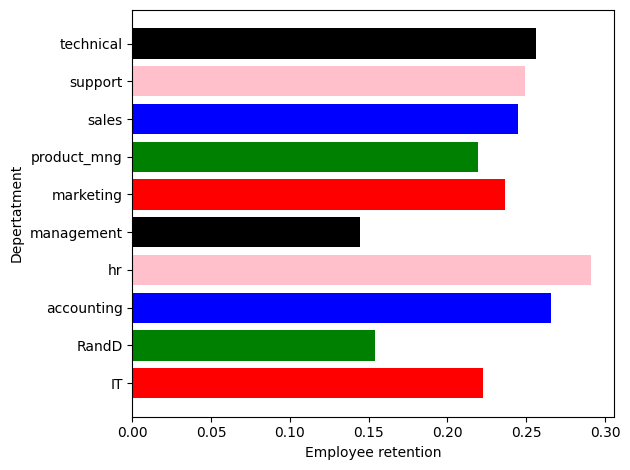

In [36]:
plot = df.groupby('Department')['left'].mean()
plt.barh(plot.index,plot.values,color =['r','g','b','pink','black'])
plt.xlabel ('Employee retention')
plt.ylabel('Depertatment')
plt.tight_layout()


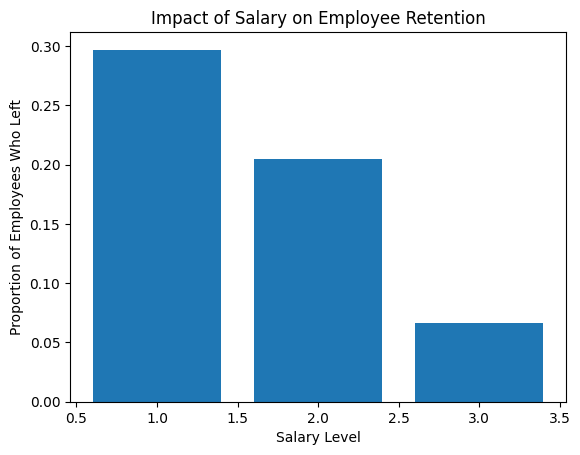

In [17]:
import matplotlib.pyplot as plt

# Group by salary and take the mean of 'left'
salary_retention = df.groupby('salary')['left'].mean()

# Plot
plt.bar(salary_retention.index, salary_retention.values)
plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees Who Left")
plt.title("Impact of Salary on Employee Retention")
plt.show()


In [37]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'salary_num'],
      dtype='object')

In [40]:
x = df[['salary','satisfaction_level','average_montly_hours']]
y = df['left']

In [55]:
from sklearn.model_selection import train_test_split
x_t,x_T,y_t,y_T = train_test_split(x,y,test_size=0.1)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
model.fit(x_t,y_t)

LogisticRegression()

In [60]:
x_T

,salary,satisfaction_level,average_montly_hours
11370,3,0.21,175
1567,1,0.40,132
9745,3,0.15,251
3225,2,0.84,184
8823,1,0.75,181
...,...,...,...
14593,2,0.45,144
10462,1,0.97,264
10290,1,0.64,169
8411,1,1.00,270


In [65]:
model.predict([[1,0.20,100]])

c:\Users\yousaf\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [57]:
model.score(x_t,y_t)

0.783391362323135

In [49]:
df.iloc[13311]

satisfaction_level        0.96
last_evaluation           0.85
number_project               4
average_montly_hours       247
time_spend_company           3
Work_accident                0
left                         0
promotion_last_5years        0
Department               sales
salary                       3
salary_num                   3
Name: 13311, dtype: object